# Pandas Tutorial

### Importing libraries

Use *pip install pandas* or *conda install pandas*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Basic Syntax

#### Series

Series are essentially a column in a table. It can have a title and custom indices

In [2]:
series = pd.Series([20,21,300],name = 'numbers')
series

0     20
1     21
2    300
Name: numbers, dtype: int64

It can be spliced like a list in python

In [3]:
series[0]

20

In [4]:
series[0:2] #this will create another series

0    20
1    21
Name: numbers, dtype: int64

#### The dataframe

In [5]:
data = {"a":[1,2,3], "b":[4,5,6], "c":[7,8,9]} # this is known as a dictionary
df = pd.DataFrame(data)
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [6]:
col_df = pd.concat([series,df],axis=1) #axis = 1 means concatenate along the columns
col_df

,numbers,a,b,c
0,20,1,4,7
1,21,2,5,8
2,300,3,6,9


In [7]:
new_row = pd.DataFrame([[13,14,15]],columns = ['a','b','c'])
new_row

,a,b,c
0,13,14,15


In [8]:
row_df = pd.concat([df,new_row],axis=0) #axis = 0 means concatinate along the rows
row_df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
0,13,14,15


In [9]:
row_df.reset_index(drop=True,inplace=True) #drop=True means drop the old index
row_df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,13,14,15


In [10]:
names = ['Mungo','Greg','Balthazar']
col_df['Names'] = names
col_df

,numbers,a,b,c,Names
0,20,1,4,7,Mungo
1,21,2,5,8,Greg
2,300,3,6,9,Balthazar


In [11]:
col_df.drop(['a','b','c'],axis=1,inplace=True) #axis = 1 means drop the column
col_df

,numbers,Names
0,20,Mungo
1,21,Greg
2,300,Balthazar


In [12]:
col_df.rename(columns={'numbers':'Age'},inplace=True)
col_df

,Age,Names
0,20,Mungo
1,21,Greg
2,300,Balthazar


*Exercise 1: Add your name and age to col_df as a new row*

In [13]:
new_row1 = pd.DataFrame([[20,'Hazel']],columns = ['Age','Names'])
new_df = pd.concat([col_df,new_row1],axis=0) #axis = 0 means concatenate along the rows
new_df



,Age,Names
0,20,Mungo
1,21,Greg
2,300,Balthazar
0,20,Hazel


*Exercise 2: Add a new column called 'Surname', with a made up surname for each character*

In [14]:
sur = ['aaa','bbb','ccc','ddd']
new_df['Surname'] = sur
new_df

## new_df['Surname'] = ['aaa','bbb','ccc','ddd']

,Age,Names,Surname
0,20,Mungo,aaa
1,21,Greg,bbb
2,300,Balthazar,ccc
0,20,Hazel,ddd


#### External data

The head of all dataframes is taken for easier viewing

In [15]:
real_estate = pd.read_csv("data/real_estate.csv")

C:\Users\billy\AppData\Local\Temp\ipykernel_11600\2534597171.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv("data/real_estate.csv")


In [16]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [51]:
real_estate.describe()

,Serial Number,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,8.815100e+08,5.000000e+09,1.226420e+06


In [17]:
real_estate.isna().sum() #returns the number of null values in each column

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

In [18]:
real_estate.head() #returns the first 5 rows

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [19]:
real_estate[['Serial Number','List Year']].head() #columns can be accessed by name

,Serial Number,List Year
0,2020348,2020
1,20002,2020
2,200212,2020
3,200243,2020
4,200377,2020


In [20]:
real_estate.iloc[0:,0:2].head() #or using iloc

,Serial Number,List Year
0,2020348,2020
1,20002,2020
2,200212,2020
3,200243,2020
4,200377,2020


In [21]:
real_estate.iloc[0,0] #iloc is used to select rows and columns by their index location

2020348

In [22]:
real_estate[real_estate['List Year']==2020].head() #selecting rows based on a condition

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [23]:
real_estate['Town'][real_estate['List Year']==2020].head() #selecting a column based on a condition

0    Ansonia
1    Ashford
2       Avon
3       Avon
4       Avon
Name: Town, dtype: object

*Exercise 3: Show the address of all commercial properties*

In [24]:
real_estate['Address'][real_estate['Property Type']=='Commercial'].to_frame()

,Address
0,230 WAKELEE AVE
8,23 AMITY RD
13,119 MONTOWESE ST
29,131 KENT RD
31,1467 SOUTH ST
...,...
66783,570 MERIDEN RD 456 FROST RD &
66784,504 WOLCOTT RD
66794,60 WESTWOOD #48-49
66796,24 DEPOT ST


*Exercise 4: Show all data for properties that are in Avon*

In [25]:
real_estate[real_estate['Town']=='Avon']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN
5,200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.6780,Residential,Single Family,NaN,NaN,NaN,NaN
93,10530,2001,09/12/2002,Avon,1 PUTNAM LN,97300.0,200000.0,0.4865,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980807,190366,2019,08/17/2020,Avon,516 LOVELY STREET,153280.0,270000.0,0.5677,Single Family,Single Family,07 - Change in Property,NaN,TOTAL RENOVATION PER MLS - SEE PREVIOUS SALE #...,NaN
980844,190019,2019,10/08/2019,Avon,3 COTTONWOOD DRIVE,109470.0,162000.0,0.6757,Condo,Condo,NaN,NaN,NaN,NaN
981493,190410,2019,09/14/2020,Avon,117 HAYNES ROAD,214720.0,390000.0,0.5506,Single Family,Single Family,NaN,NaN,NaN,NaN
981748,190320,2019,07/14/2020,Avon,559 WEST AVON ROAD,302060.0,428500.0,0.7049,Single Family,Single Family,NaN,NaN,NaN,NaN


*Exercise 5: Show the first 10 rows of the sales ratio and the address in one dataframe*

In [26]:
real_estate[['Sales Ratio','Address']].head(10)

## .iloc[0:10]

,Sales Ratio,Address
0,0.4630,230 WAKELEE AVE
1,0.5883,390 TURNPIKE RD
2,0.7248,5 CHESTNUT DRIVE
3,0.6958,111 NORTHINGTON DRIVE
4,0.5957,70 FAR HILLS DRIVE
5,0.6780,57 FAR HILLS DRIVE
6,1.8015,1539 FARMINGTON AVE
7,0.6081,216 WATCH HILL RD
8,0.6427,23 AMITY RD
9,0.5115,16 DEEPWOOD DRIVE


In [27]:
real_estate['Property Type'].unique() #returns the unique values in a column

array(['Commercial', 'Residential', 'Vacant Land', nan, 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [28]:
real_estate['Property Type'].value_counts() #returns the number of times each unique value appears in a column

Property Type
Single Family     401612
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

In [29]:
real_estate[real_estate['Non Use Code'].isna()].head() #selecting rows where a column is null

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [30]:
real_estate[~real_estate['Non Use Code'].isna()].head() #selecting rows where a column is not null

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
6,2020180,2020,03/01/2021,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.8015,Residential,Two Family,08 - Part Interest,NaN,NaN,NaN
18,201212,2020,08/23/2021,Bristol,8 JENNINGS TERR,88060.0,91000.0,0.9676,Residential,Single Family,14 - Foreclosure,FORECLOSURE SALE OUT OF BANK,NaN,NaN
24,2000330,2020,05/20/2021,Cheshire,844 HIGHLAND AVE,144220.0,204000.0,0.7069,Residential,Single Family,25 - Other,DEFERRED MAINTENANCE,NaN,NaN
39,201018,2020,06/03/2021,Danbury,55 FOREST AV,136900.0,150000.0,0.9126,Residential,Single Family,01 - Family,FAMILY TRANSFER / I11200,NaN,NaN
45,20013,2020,12/16/2020,Eastford,GENERAL LYON RD,2200.0,20000.0,0.1100,Vacant Land,NaN,12 - Non Buildable Lot,UNBLDBL,NaN,NaN


In [31]:
real_estate['List Year'][~(real_estate['List Year']==2019)].unique() #selecting rows where a column is not equal to a value
#REMEMBER BRACKETS

array([2020, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [32]:
real_estate['List Year'].isin([2020])

0          True
1          True
2          True
3          True
4          True
          ...  
997208    False
997209    False
997210    False
997211    False
997212    False
Name: List Year, Length: 997213, dtype: bool

In [33]:
real_estate[real_estate['List Year'].isin([2020])] #selecting rows where a column is equal to any value in a list

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66827,20200144,2020,11/04/2020,Stratford,66 ACADEMY HILL TERRACE,213150.0,379000.0,0.562400,Residential,Single Family,NaN,NaN,NaN,NaN
66828,200605,2020,12/11/2020,Waterbury,1103 COOKE ST,66210.0,158000.0,0.419000,Residential,Single Family,NaN,NaN,NaN,NaN
66829,200547,2020,12/01/2020,Waterbury,45 DEERWOOD LANE #45-2,28100.0,30000.0,0.936667,Residential,Condo,25 - Other,PRIVATE SALE,NaN,POINT (-73.03103 41.59294)
66830,200622,2020,04/29/2021,Torrington,21 PROSPECT ST UNIT 3,40190.0,52500.0,0.765500,Residential,Condo,NaN,NaN,NaN,POINT (-73.12447 41.79805)


*Exercise 6: What will the following code return:*

real_estate[real_estate['List Year']==2020]

In [34]:
ex6 = real_estate[real_estate['List Year']==2020]
#ex6

*Exercise 7: How many addresses are null?*

In [35]:
real_estate[real_estate['Address'].isna()].count()


Serial Number       51
List Year           51
Date Recorded       49
Town                51
Address              0
Assessed Value      51
Sale Amount         51
Sales Ratio         51
Property Type        4
Residential Type     4
Non Use Code        48
Assessor Remarks     1
OPM remarks          0
Location             5
dtype: int64

*Exercise 8: What will the following code return:*

real_estate['Property Type'][real_estate['Residential Type']=='Two Family'].unique()

In [36]:
twofam = real_estate['Property Type'][real_estate['Residential Type']=='Two Family'].unique()
twofam

array(['Residential', 'Two Family'], dtype=object)

In [37]:
real_estate['Property Type'][real_estate['Residential Type']=='Single Family'].unique()

array(['Residential', 'Single Family'], dtype=object)

*Exercise 9: What will the following code return:*

real_estate[real_estate['Residential Type']=='Single Family'][real_estate['Property Type'].isin(twofam)]['Property Type'].unique()

In [38]:
ex9 = real_estate[real_estate['Residential Type']=='Single Family'][real_estate['Property Type'].isin(twofam)]['Property Type'].unique()
ex9

C:\Users\billy\AppData\Local\Temp\ipykernel_11600\31782334.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex9 = real_estate[real_estate['Residential Type']=='Single Family'][real_estate['Property Type'].isin(twofam)]['Property Type'].unique()


array(['Residential'], dtype=object)

*Exercise 10: Find how many unique towns are in the dataset*

In [39]:
len(real_estate['Town'].unique())

170

*Exercise 11: Find how many towns have a condo for sale and not a four family house (hint: revise how to use ".isin()")*

In [40]:
# *Exercise 11: Find how many towns have a condo for sale and not a four family house (hint: revise how to use ".isin()")*
num_towns = len(real_estate['Town'][real_estate['Property Type']=='Condo'][~real_estate['Property Type'].isin(['Four Family'])].unique())
num_towns

156

In [41]:
real_estate['List Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 997213 entries, 0 to 997212
Series name: List Year
Non-Null Count   Dtype
--------------   -----
997213 non-null  int64
dtypes: int64(1)
memory usage: 7.6 MB


In [42]:
real_estate['List Year'] = real_estate['List Year'].astype('str') #changing the data type of a column
real_estate['List Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 997213 entries, 0 to 997212
Series name: List Year
Non-Null Count   Dtype 
--------------   ----- 
997213 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [43]:
string_list = pd.Series(["Hello","World","!"])
string_list

0    Hello
1    World
2        !
dtype: object

In [44]:
string_list.str.replace("l","w")

0    Hewwo
1    Worwd
2        !
dtype: object

In [45]:
numbers = pd.Series([1,2,3,4,5,6,7,8,9,10])
numbers.apply(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
5    2.449490
6    2.645751
7    2.828427
8    3.000000
9    3.162278
dtype: float64

In [46]:
numbers.apply(lambda x: max(x,5))

0     5
1     5
2     5
3     5
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

#### Visualisation

Text(0.5, 1.0, 'Number of Properties Listed per Year')

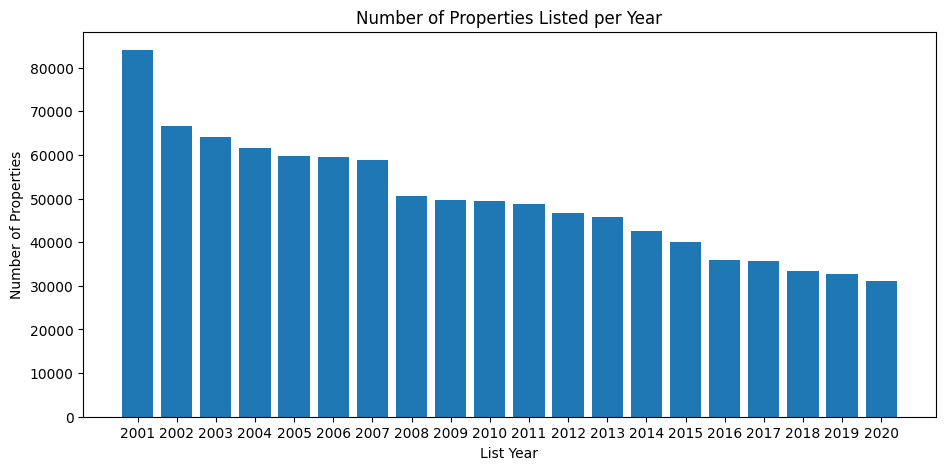

In [47]:
#creating bar charts
plt.figure(figsize=(11,5))
plt.bar(real_estate['List Year'].sort_values().unique().astype(str),real_estate['List Year'].value_counts())
plt.xlabel('List Year')
plt.ylabel('Number of Properties')
plt.title('Number of Properties Listed per Year')

#sort_values() sorts the years in ascending order
#astype(str) converts the years to strings
#unique() returns the unique years
#value_counts() counts the number of times each year appears in the series

Text(0.5, 1.0, 'Sale Amount vs Assessed Value')

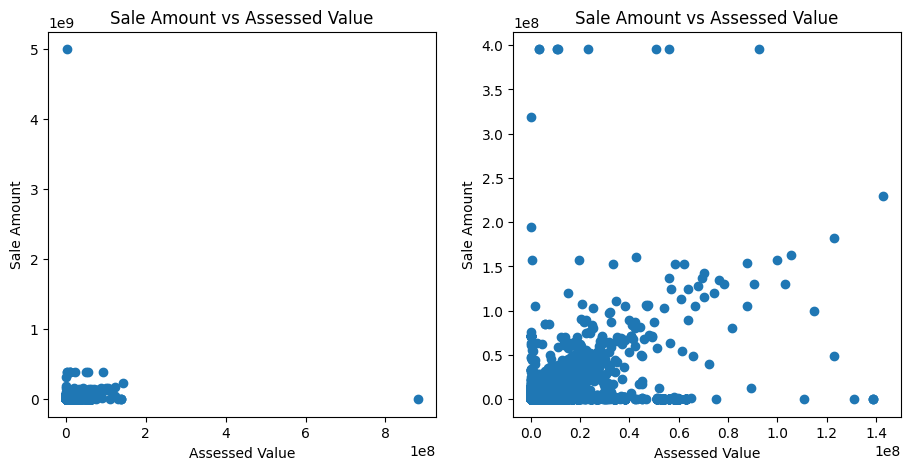

In [48]:
#plotting two scatterplots side by side
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)

plt.scatter(real_estate['Assessed Value'],real_estate['Sale Amount'])
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.title('Sale Amount vs Assessed Value')

plt.subplot(1,2,2)

#remove outliers
assessed = real_estate['Assessed Value'][(real_estate['Sale Amount']<4000000000)&(real_estate['Assessed Value']<800000000)]
sale = real_estate['Sale Amount'][(real_estate['Sale Amount']<4000000000)&(real_estate['Assessed Value']<800000000)]

plt.scatter(assessed,sale)
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.title('Sale Amount vs Assessed Value')

C:\Users\billy\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\billy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


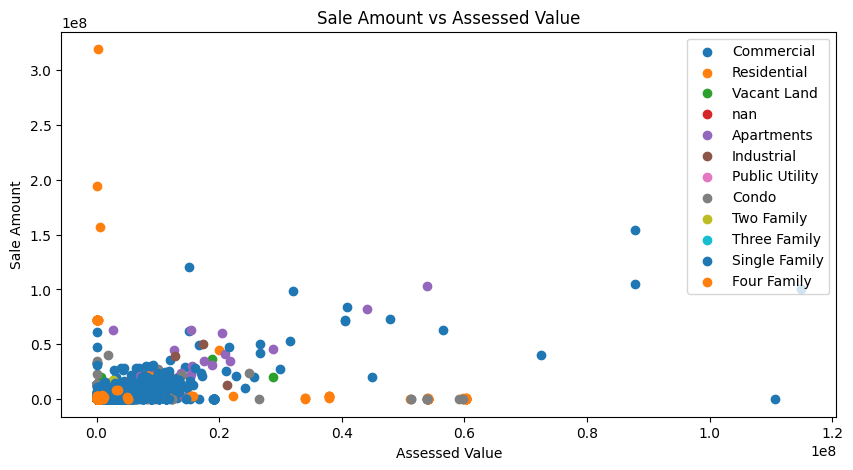

In [49]:
plt.figure(figsize=(10,5))
for property in real_estate['Property Type'].unique():
    plt.scatter(assessed[real_estate['Property Type']==property],sale[real_estate['Property Type']==property],label=property)
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.title('Sale Amount vs Assessed Value')
plt.legend()

Text(0.5, 1.0, 'Sales Ratio Distribution')

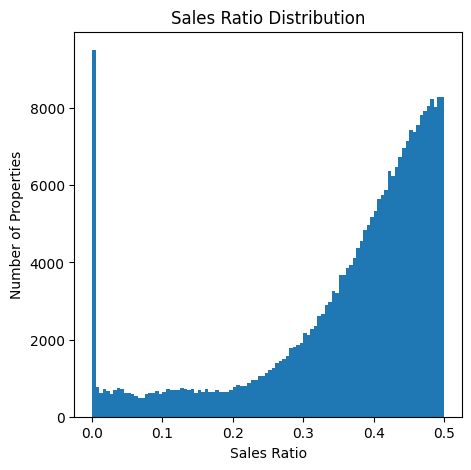

In [50]:
plt.figure(figsize=(5,5))
plt.hist(real_estate['Sales Ratio'][real_estate['Sales Ratio']<0.5],bins=100)
plt.xlabel('Sales Ratio')
plt.ylabel('Number of Properties')
plt.title('Sales Ratio Distribution')